## **Dataset Description** 

The data provided in this set is the fuel quality data from the Federal Energy Regulatory Commission which is provided by the United States Energy Information Administration. The data consists of the following columns:

'Record_id' : record id

'Utility_id_ferc1': Utility id assigned by the FERC

'Report_year': year of report

'Plant_name_ferc1': the name of the plant

'Fuel_type_code_pudl': the type of fuel

'Fuel_unit': the unit of fuel

'Fuel_qty_burned': the quantity of fuel burned

'Fuel_mmbtu_per_unit': the measure of energy per unit

'fuel_cost_per_unit_burned': the fuel cost per unit burned

'Fuel_cost_per_unit_delivered': the cost of fuel delivered per unit

'fuel_cost_per_mmbtu': the cost of fuel per mmbtu

**Set goal for Description**

I believe the aim of this analysis and description is to examine the usage and environmental impact assessment of different fuel type and fuel quality according to the US Federal Energy Regulatory comission.

**Importing Necessary Libraries for Data Analysis**

In [1]:
import pandas as pd
import numpy as np
fuel_data = pd.read_csv('https://github.com/WalePhenomenon/climate_change/blob/master/fuel_ferc1.csv?raw=true',error_bad_lines=False)

In [2]:
fuel_data.describe(include='all')

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523,29523.000000,29523.000000,29523,29523,29343,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
unique,29523,NaN,NaN,2315,6,9,NaN,NaN,NaN,NaN,NaN
top,f1_fuel_2007_12_145_0_7,NaN,NaN,big stone,gas,mcf,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,156,11486,11354,NaN,NaN,NaN,NaN,NaN
mean,NaN,118.601836,2005.806050,NaN,NaN,NaN,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,NaN,74.178353,7.025483,NaN,NaN,NaN,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,NaN,1.000000,1994.000000,NaN,NaN,NaN,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,NaN,55.000000,2000.000000,NaN,NaN,NaN,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,NaN,122.000000,2006.000000,NaN,NaN,NaN,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,NaN,176.000000,2012.000000,NaN,NaN,NaN,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000


In [3]:
# check for missing values
fuel_data.isnull().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

In [4]:
#use groupby to count the sum of each unique value in the fuel unit column
fuel_data.groupby('fuel_unit')['fuel_unit'].count()
fuel_data[['fuel_unit']] = fuel_data[['fuel_unit']].fillna(value='mcf')

In [5]:
# check if missing values has been filled
fuel_data.isnull().sum()

record_id                       0
utility_id_ferc1                0
report_year                     0
plant_name_ferc1                0
fuel_type_code_pudl             0
fuel_unit                       0
fuel_qty_burned                 0
fuel_mmbtu_per_unit             0
fuel_cost_per_unit_burned       0
fuel_cost_per_unit_delivered    0
fuel_cost_per_mmbtu             0
dtype: int64

In [6]:
fuel_data.groupby('report_year')['report_year'].count

<bound method SeriesGroupBy.count of <pandas.core.groupby.generic.SeriesGroupBy object at 0x7f921e98d470>>

In [7]:
#group by the fuel type code year and print the first entries in all the groups formed
fuel_data.groupby('fuel_type_code_pudl').first()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
fuel_type_code_pudl,,,,,,,,,,
coal,f1_fuel_1994_12_1_0_7,1,1994,rockport,ton,5377489.0,16.590000,18.590,18.530,1.121
gas,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,mcf,40533.0,1.000000,2.770,2.770,2.570
nuclear,f1_fuel_1994_12_2_1_1,2,1994,joseph m. farley,kgU,2260.0,0.064094,28.770,0.000,0.450
oil,f1_fuel_1994_12_6_0_2,6,1994,clinch river,bbl,6510.0,5.875338,32.130,23.444,5.469
other,f1_fuel_1994_12_11_0_6,11,1994,w.f. wyman,bbl,55652.0,0.149719,14.685,15.090,2.335
waste,f1_fuel_1994_12_9_0_3,9,1994,b.l. england,ton,2438.0,0.015939,34.180,34.180,1.072


In [8]:
# Merging in Pandas

fuel_df1 = fuel_data.iloc[0:19000].reset_index(drop=True)
fuel_df2 = fuel_data.iloc[19000:].reset_index(drop=True)

In [9]:
#check that the length of both dataframes sum to the expected length

assert len(fuel_data) == (len(fuel_df1) + len(fuel_df2))

In [10]:
#an inner merge will lose rows that do not match in both dataframes
pd.merge(fuel_df1, fuel_df2, how= 'inner')


,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu


In [11]:
#outer merge returns all rows in both dataframes
pd.merge(fuel_df1, fuel_df2, how= 'outer')

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570
...,...,...,...,...,...,...,...,...,...,...,...
29518,f1_fuel_2018_12_12_0_13,12,2018,neil simpson ct #1,gas,mcf,18799.0,1.059,4.78,4.78,9.030
29519,f1_fuel_2018_12_12_1_1,12,2018,cheyenne prairie 58%,gas,mcf,806730.0,1.050,3.65,3.65,6.950
29520,f1_fuel_2018_12_12_1_10,12,2018,lange ct facility,gas,mcf,104554.0,1.060,4.77,4.77,8.990
29521,f1_fuel_2018_12_12_1_13,12,2018,wygen 3 bhp 52%,coal,ton,315945.0,16.108,3.06,14.76,1.110


In [12]:
#removes rows from the right dataframe that do not have a match with the left
#and keeps all rows from the left
pd.merge(fuel_df1, fuel_df2, how= 'left')

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590000,18.590,18.530,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592000,18.580,18.530,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130000,39.720,38.120,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950000,47.210,45.990,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000000,2.770,2.770,2.570
...,...,...,...,...,...,...,...,...,...,...,...
18995,f1_fuel_2009_12_182_1_9,182,2009,lake road,gas,mcf,340857.0,1.000000,4.711,4.711,4.711
18996,f1_fuel_2009_12_182_1_10,182,2009,lake road,oil,mcf,771.0,5.801544,84.899,84.899,14.634
18997,f1_fuel_2009_12_182_1_13,182,2009,iatan (18%),coal,ton,414142.0,16.718000,18.509,17.570,1.107
18998,f1_fuel_2009_12_182_1_14,182,2009,iatan (18%),oil,bbl,5761.0,5.537910,83.636,72.280,15.102


In [13]:
data_to_concat = pd.DataFrame()

In [14]:
pd.concat([fuel_data, data_to_concat]).reset_index(drop=True)

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570
...,...,...,...,...,...,...,...,...,...,...,...
29518,f1_fuel_2018_12_12_0_13,12,2018,neil simpson ct #1,gas,mcf,18799.0,1.059,4.78,4.78,9.030
29519,f1_fuel_2018_12_12_1_1,12,2018,cheyenne prairie 58%,gas,mcf,806730.0,1.050,3.65,3.65,6.950
29520,f1_fuel_2018_12_12_1_10,12,2018,lange ct facility,gas,mcf,104554.0,1.060,4.77,4.77,8.990
29521,f1_fuel_2018_12_12_1_13,12,2018,wygen 3 bhp 52%,coal,ton,315945.0,16.108,3.06,14.76,1.110


In [15]:
#check for duplicate rows
fuel_data.duplicated().any()

False

## **Numerical attributes and outliers **


In [16]:
# Reading dataset general information
fuel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29523 entries, 0 to 29522
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   record_id                     29523 non-null  object 
 1   utility_id_ferc1              29523 non-null  int64  
 2   report_year                   29523 non-null  int64  
 3   plant_name_ferc1              29523 non-null  object 
 4   fuel_type_code_pudl           29523 non-null  object 
 5   fuel_unit                     29523 non-null  object 
 6   fuel_qty_burned               29523 non-null  float64
 7   fuel_mmbtu_per_unit           29523 non-null  float64
 8   fuel_cost_per_unit_burned     29523 non-null  float64
 9   fuel_cost_per_unit_delivered  29523 non-null  float64
 10  fuel_cost_per_mmbtu           29523 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 2.5+ MB


In [17]:
# Describing the numerical attributes
fuel_data.describe()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523.000000,29523.000000,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
mean,118.601836,2005.806050,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,74.178353,7.025483,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,1.000000,1994.000000,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,55.000000,2000.000000,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,122.000000,2006.000000,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,176.000000,2012.000000,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000
max,514.000000,2018.000000,5.558942e+08,341.260000,139358.000000,7.964521e+06,359278.000000


In [18]:
## Counting how many unique utility_id_ferc1 are in the dataset:
len(fuel_data['utility_id_ferc1'].unique())

185

since utility_id_ferc1 represents the fuel_data identification, any numerical operations should not be applied to it 

In [19]:
## Counting how many unique plant_name_ferc1 are in the dataset:
len(fuel_data['plant_name_ferc1'].unique())

2315

In [20]:
## Counting how many report_year are in the dataset:
len(fuel_data['report_year'].unique())

25

In [21]:
## Counting how many fuel_type_code_pudl are in the dataset:
len(fuel_data['fuel_type_code_pudl'].unique())

6

In [22]:
## Counting how many fuel_unit are in the dataset:
len(fuel_data['fuel_unit'].unique())

9

## Data Visualization and Categorical attributes

## Fuel_data attribute:

In [23]:
## Counting fuel_unit
fuel_data.fuel_unit.value_counts()

mcf       11534
ton        8958
bbl        7998
gramsU      464
mmbtu       180
kgU         110
mwhth       100
mwdth        95
gal          84
Name: fuel_unit, dtype: int64

From the counts above, mcf fuel_unit have the highest counts which implies is it the highest consumable unit. This brought about dwelling mostly on the first three units- mcf, ton, and gramsU.

In [24]:
# Importing plotting library
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Examining how different parameters relate to each other**


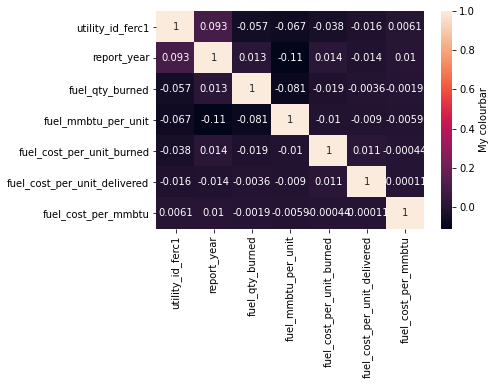

In [25]:
sns.heatmap(fuel_data.corr(), annot= True, cbar_kws={'label': 'My colourbar', 'orientation': 'vertical'})

## Observations:

Looking at the heatmap displayed above, it seems there is no obvious correlation variations by looking at the colour outliers and their values. 

In [26]:
fuel_data_corr = fuel_data.corr()
print(fuel_data_corr)

                              utility_id_ferc1  ...  fuel_cost_per_mmbtu
utility_id_ferc1                      1.000000  ...             0.006122
report_year                           0.093323  ...             0.010261
fuel_qty_burned                      -0.057447  ...            -0.001896
fuel_mmbtu_per_unit                  -0.066946  ...            -0.005884
fuel_cost_per_unit_burned            -0.037863  ...            -0.000437
fuel_cost_per_unit_delivered         -0.016414  ...            -0.000109
fuel_cost_per_mmbtu                   0.006122  ...             1.000000

[7 rows x 7 columns]


In [27]:
print(fuel_data_corr.describe())

       utility_id_ferc1  ...  fuel_cost_per_mmbtu
count          7.000000  ...             7.000000
mean           0.131539  ...             0.144008
std            0.386677  ...             0.377495
min           -0.066946  ...            -0.005884
25%           -0.047655  ...            -0.001167
50%           -0.016414  ...            -0.000109
75%            0.049722  ...             0.008191
max            1.000000  ...             1.000000

[8 rows x 7 columns]


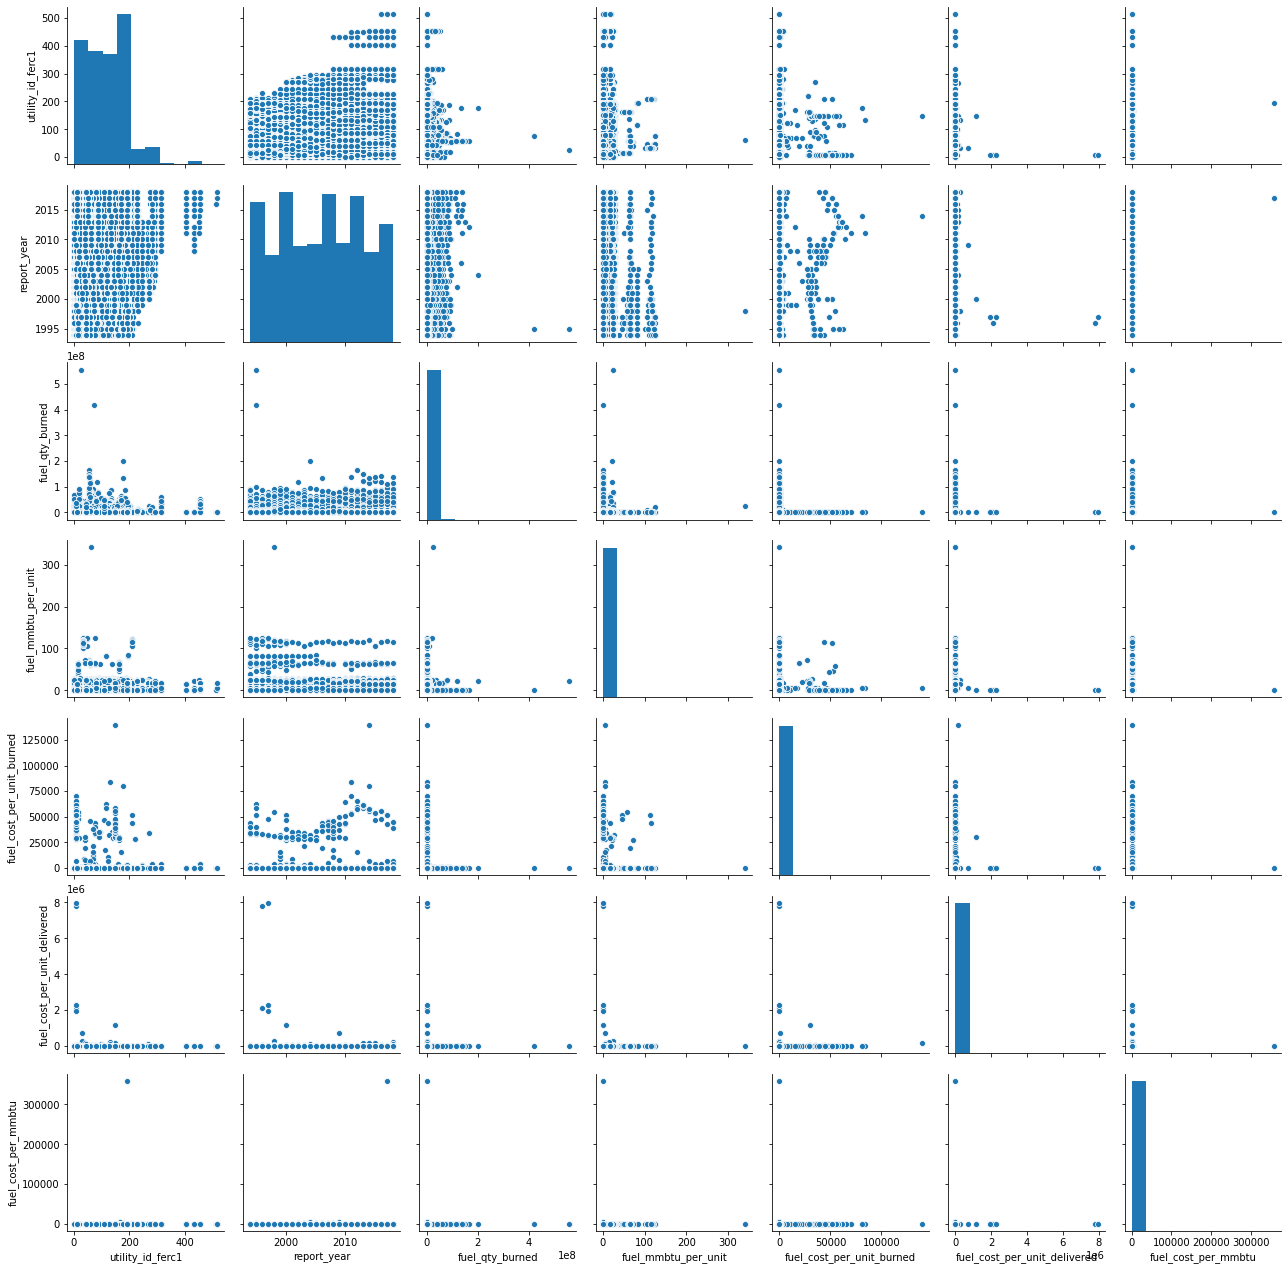

In [28]:
# for clearer comparison, lets plot pairplot to enable better view and comparison

All_feature = sns.pairplot((fuel_data), dropna = True)

## Amount of Fuel Burned by Fuel Unit

Text(0.5, 0.98, 'fuel_qty_burned by fuel_unit')

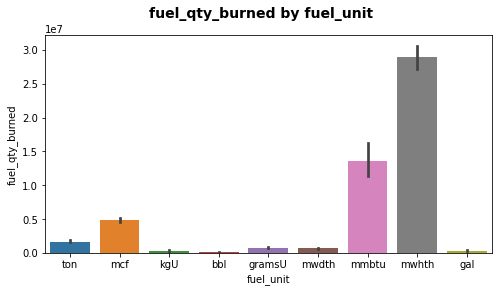

In [29]:
plt.figure(figsize=(8,4), frameon=True)
burned_unit = sns.barplot(fuel_data['fuel_unit'], fuel_data['fuel_qty_burned'])
plt.suptitle('fuel_qty_burned by fuel_unit', fontsize=14, fontweight='bold')



From above figure, is obvious that mwhth and mmbtu have the highest fuel_qty_burned which implies that consumers consume them maybe because of their optimum burning capability and enviromental friendly.

## Amount of Fuel Burned by Fuel plant Type

Text(0.5, 0.98, 'fuel_qty_burned by plant_name_ferc1')

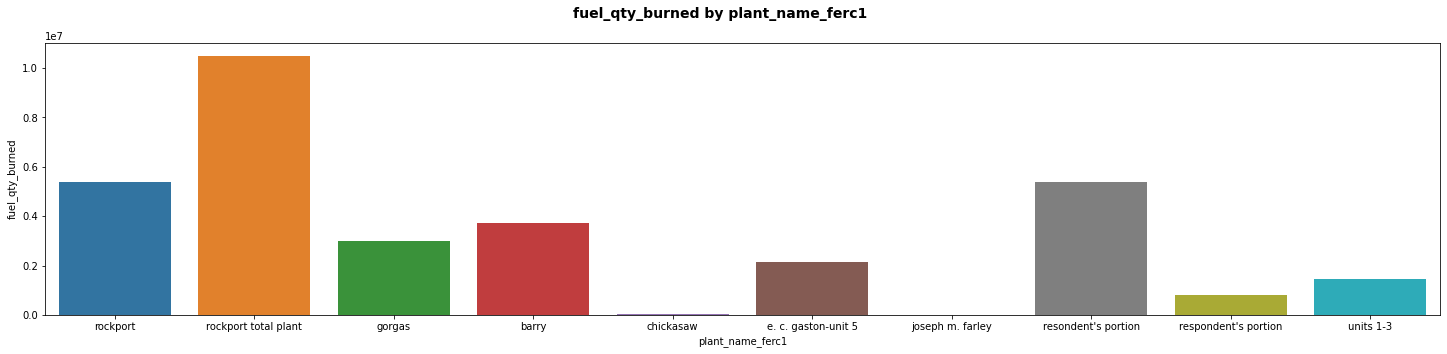

In [30]:
fuel_plant = fuel_data['plant_name_ferc1']
fuel_plant = fuel_plant[:10]
plt.figure(figsize=(25,5))
burned_unit = sns.barplot(fuel_plant, fuel_data['fuel_qty_burned'])
colors = ['tab:black', 'tab:green', 'tab:purple']
plt.suptitle('fuel_qty_burned by plant_name_ferc1', fontsize=14, fontweight='bold')

## Observations:

From the look above, rockport and rockport total plant dominate the higher fuel burning rate.

## Amount of Fuel Burned by Report Year

Text(0.5, 0.98, 'fuel_qty_burned by report_year')

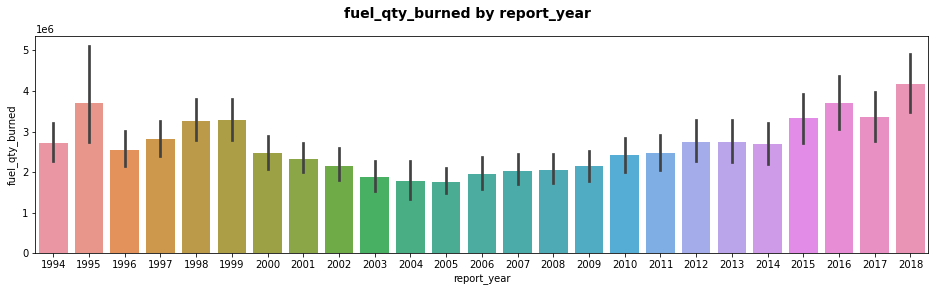

In [31]:
plt.figure(figsize=(16,4))
burned_unit = sns.barplot(fuel_data['report_year'],fuel_data['fuel_qty_burned'])
plt.suptitle('fuel_qty_burned by report_year', fontsize=14, fontweight='bold')

## Observations:

Above barplot reveals that fuel quantity burned started decreasing from 1999 and commence increment from 2006 though 2018.

Text(0.5, 0.98, 'fuel_qty_burned by fuel_type_code')

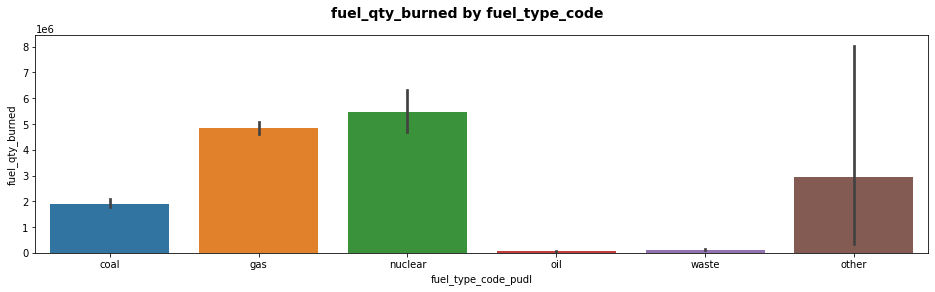

In [32]:
plt.figure(figsize=(16,4))
burned_unit = sns.barplot(fuel_data['fuel_type_code_pudl'],fuel_data['fuel_qty_burned'])
plt.suptitle('fuel_qty_burned by fuel_type_code', fontsize=14, fontweight='bold')

## Observations:

It is obvious that the widely used fuel types in terms of fuel quantity  are nuclear, gas and coal. Consumers consume nuclear fuel type more and followed by gas, maybe is because of their negligible effect on physical enviroment and cost effects.

## Fuel cost according to Fuel Types and Units

Text(0.5, 0.98, 'fuel_type_code_pudl by fuel_cost_per_mmbtu')

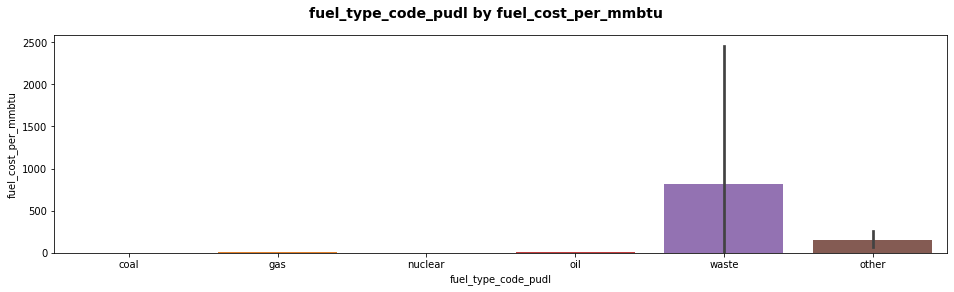

In [33]:
plt.figure(figsize=(16,4))
type_unit = sns.barplot(fuel_data['fuel_type_code_pudl'],fuel_data['fuel_cost_per_mmbtu'])
plt.suptitle('fuel_type_code_pudl by fuel_cost_per_mmbtu', fontsize=14, fontweight='bold')

## Observations:

waste is the highest fuel type used in this scenario- probably is because waste sources are radily available and not cost affective.

Text(0.5, 0.98, 'fuel_type_code_pudl by fuel_cost_per_unit_delivered')

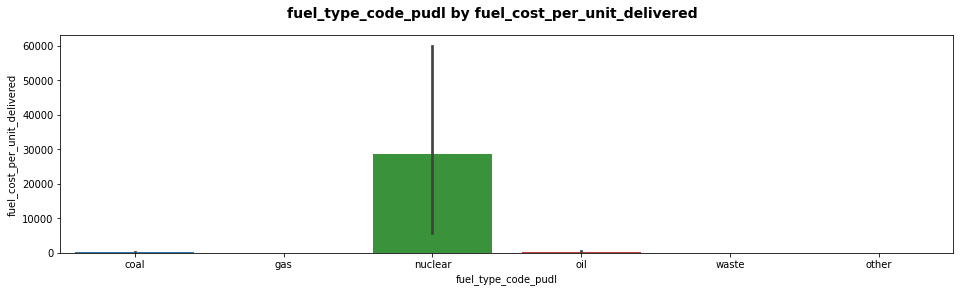

In [34]:
plt.figure(figsize=(16,4))
type_unit = sns.barplot(fuel_data['fuel_type_code_pudl'],fuel_data['fuel_cost_per_unit_delivered'])
plt.suptitle('fuel_type_code_pudl by fuel_cost_per_unit_delivered', fontsize=14, fontweight='bold')

## Observations:

Nuclear source of fuel type is rare and as a result, it is the highest in terms of cost per unit.

Text(0.5, 0.98, 'fuel_type_code_pudl by fuel_cost_per_unit_burned')

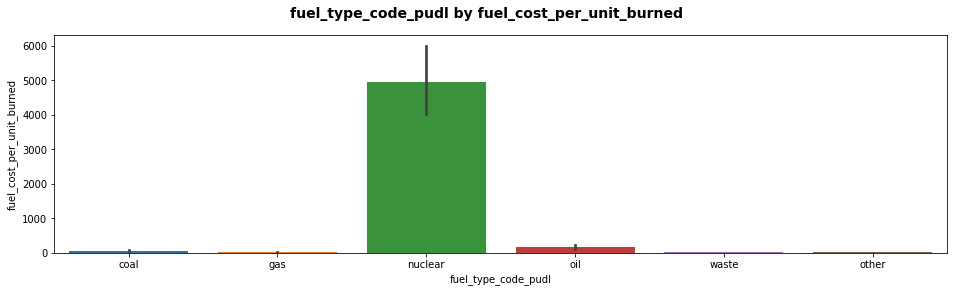

In [35]:
plt.figure(figsize=(16,4))
type_unit = sns.barplot(fuel_data['fuel_type_code_pudl'],fuel_data['fuel_cost_per_unit_burned'])
plt.suptitle('fuel_type_code_pudl by fuel_cost_per_unit_burned', fontsize=14, fontweight='bold')

## Observations

From the plot above, is obvious that nuclear fuel type burn faster than any other source because of its density and flammability capability and oil follows suit due to its flammabilty nature too.

## How change of Fuel price occur Annually

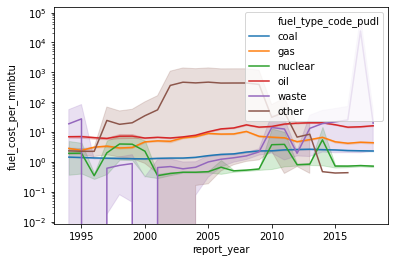

In [36]:
g = sns.lineplot(x='report_year', y='fuel_cost_per_mmbtu', hue='fuel_type_code_pudl', data=fuel_data)
g.set_yscale("log")

##From observations:

* **Coal** price per mmbtu seems to be linear and stable from 1995 to 2015.
* The cost of **gas** seems to be linear but deviated slightly.
* The cost of **nuclear** varies as from 1995 and was constant until 2010 before rising.
* The cost of **oil** increased slightly but continue linaer gradient until 2015.
* The cost of **waste** increases periodically as demand and consumption increases.
* The price of others increases enormously from 1995 and decreases from 2010.


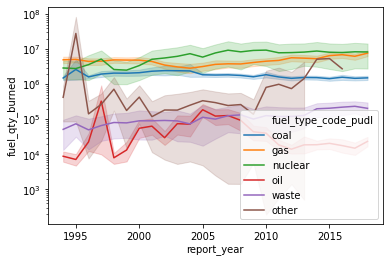

In [37]:
g = sns.lineplot(x='report_year', y='fuel_qty_burned', hue='fuel_type_code_pudl', data=fuel_data)
g.set_yscale("log")

## Observations:

* Quantity of Coal burn has been steady but slight decline towards 2005.
* Quantity of gas burn has been steady but slight rise from 2005.
* Quantity of nuclear burn rapidly with reasonable increase from 1995.
* Quantity of oil burn on the rise and decreases periodically.
* Quantity of waste and other burn in a zig-zag manner as they change instateneously.

## How are Fuel Types Utilized According to Location

Text(0.5, 0.98, 'fuel_type_code_pudl by utility_id_ferc1')

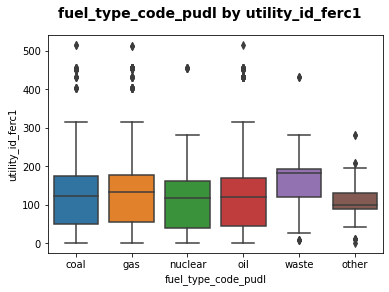

In [38]:
sns.boxplot(x='fuel_type_code_pudl', y='utility_id_ferc1', data=fuel_data)
plt.suptitle('fuel_type_code_pudl by utility_id_ferc1', fontsize=14, fontweight='bold')

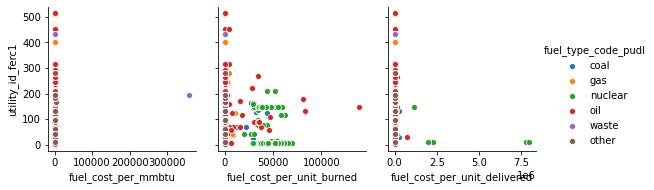

In [39]:
eff = sns.pairplot(x_vars=['fuel_cost_per_mmbtu', 'fuel_cost_per_unit_burned', 'fuel_cost_per_unit_delivered'], y_vars='utility_id_ferc1',hue='fuel_type_code_pudl',data=fuel_data)

##Observations:

1. By fuel_cost_per_mmbtu- waste fuel source cost much per mmbtu.
2. By fuel_cost_per_unit_burned- oil and nuclear fuel types dominate cost of fuel burned.
3. By fuel_cost_per_unit_delivered- nuclear dominate fuel_cost_per_unit_delivered and followed by oil.

##Conclusion

From the above analysis, fuel cost, fuel availability and burning rate are some of the attributes majorly discussed. As regard to these attributes- fuel cost is dependent on its availability, and its burning rate depends on the chemical composition of the fuel type.
However, better means of fuel sources should be recommened to harness fuel sources availability locally and on the path of enhancing sustainable electricity utilization.